# Machine Translation

In [30]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.utils import plot_model
from IPython.display import Image

# 1. Encoder-Decoder Model

## 1.1. Encoder Model

In [25]:
num_encoder_tokens=71
latent_dim = 256
num_decoder_tokens = 93

In [28]:
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

## 1.2. Decoder Model

In [35]:
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

## 1.3. Modeling

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, 71)     0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            (None, None, 93)     0                                            
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, 256), (None, 335872      input_4[0][0]                    
__________________________________________________________________________________________________
lstm_6 (LSTM)                   [(None, None, 256),  358400      input_7[0][0]                    
                                                                 lstm_3[0][1]                     
          

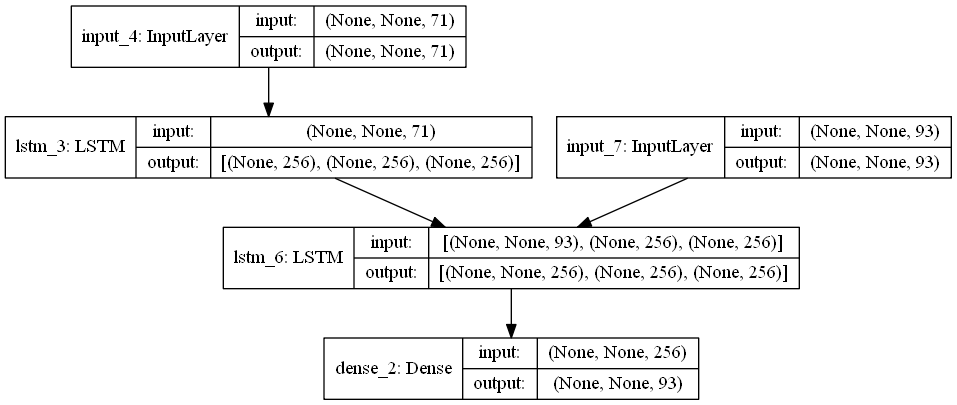

In [34]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()
plot_model(model, show_shapes=True)
Image('model.png')

# 2. Inference Model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, 71)          0         
_________________________________________________________________
lstm_3 (LSTM)                [(None, 256), (None, 256) 335872    
Total params: 335,872
Trainable params: 335,872
Non-trainable params: 0
_________________________________________________________________


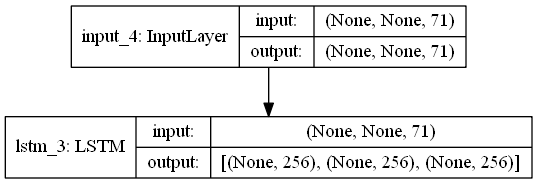

In [38]:
encoder_model = Model(encoder_inputs, encoder_states)
encoder_model.summary()
plot_model(encoder_model, show_shapes=True)
Image('model.png')

In [39]:
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

In [42]:
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, None, 93)     0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 256)          0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 256)          0                                            
__________________________________________________________________________________________________
lstm_7 (LSTM)                   [(None, None, 256),  358400      input_8[0][0]                    
                                                                 input_9[0][0]                    
          

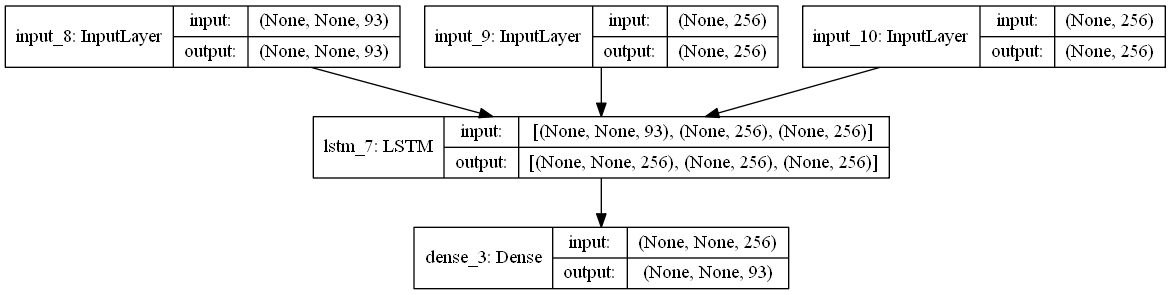

In [43]:
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
decoder_model.summary()
plot_model(decoder_model, show_shapes=True)
Image('model.png')